<a href="https://colab.research.google.com/github/rihemmaarefe/Cancer-prediction-deep-learning/blob/main/breastCancerDeepLearningFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/deepLearning/wisc_bc_data.csv")

In [ ]:
print(df.describe().T)

                   count          mean  ...           75%           max
id                 569.0  3.037183e+07  ...  8.813129e+06  9.113205e+08
radius_mean        569.0  1.412729e+01  ...  1.578000e+01  2.811000e+01
texture_mean       569.0  1.928965e+01  ...  2.180000e+01  3.928000e+01
perimeter_mean     569.0  9.196903e+01  ...  1.041000e+02  1.885000e+02
area_mean          569.0  6.548891e+02  ...  7.827000e+02  2.501000e+03
smoothness_mean    569.0  9.636028e-02  ...  1.053000e-01  1.634000e-01
compactness_mean   569.0  1.043410e-01  ...  1.304000e-01  3.454000e-01
concavity_mean     569.0  8.879932e-02  ...  1.307000e-01  4.268000e-01
points_mean        569.0  4.891915e-02  ...  7.400000e-02  2.012000e-01
symmetry_mean      569.0  1.811619e-01  ...  1.957000e-01  3.040000e-01
dimension_mean     569.0  6.279761e-02  ...  6.612000e-02  9.744000e-02
radius_se          569.0  4.051721e-01  ...  4.789000e-01  2.873000e+00
texture_se         569.0  1.216853e+00  ...  1.474000e+00  4.885

In [ ]:
print(df.isnull().sum())
#df = df.dropna()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64


In [ ]:
#Rename Dataset to Label to make it easy to understand
df = df.rename(columns={'diagnosis':'Label'})
print(df.dtypes)

id                     int64
Label                 object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object


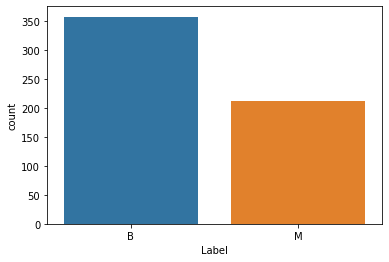

In [ ]:
#Understand the data 
sns.countplot(x="Label", data=df) #M - malignant   B - benign

In [ ]:
#1# Replace categorical values with numbers
print("Distribution of data: ", df['Label'].value_counts())

#2# Define the dependent variable that needs to be predicted (labels)
y = df["Label"].values
print("Labels before encoding are: ", np.unique(y))

#3# Encoding categorical data from text (B and M) to integers (0 and 1)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # M=1 and B=0
print("Labels after encoding are: ", np.unique(Y))

Distribution of data:  B    357
M    212
Name: Label, dtype: int64
Labels before encoding are:  ['B' 'M']
Labels after encoding are:  [0 1]


#1# Distribution of data:  B: benign    357  M: malignant    212

#2# Labzls before encoding are:  ['B' 'M']

#3# Labels after encoding are:  [0 1]


In [ ]:
#Define x and normalize / scale values

#Define the independent variables. Drop label and ID, and normalize other data


X = df.drop(labels = ["Label", "id"], axis=1) 
print(X.describe().T) #Needs scaling

In [ ]:
#Scale / normalize the values to bring them to similar range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)  #Scaled values

In [ ]:
#Split data into train and test to verify accuracy after fitting the model. 


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("Shape of training data is: ", X_train.shape)
print("Shape of testing data is: ", X_test.shape)

Shape of training data is:  (426, 30)
Shape of testing data is:  (143, 30)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import pickle


In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=30, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# pickle.dump(model, open('classifier.pkl', 'wb') )
model.save('/content/classifier.pkl')

In [ ]:
#Fit with no early stopping or other callbacks
history = model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=64,
                    validation_data=(X_test, y_test))


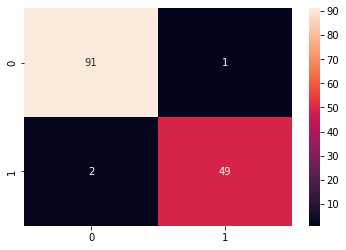

In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

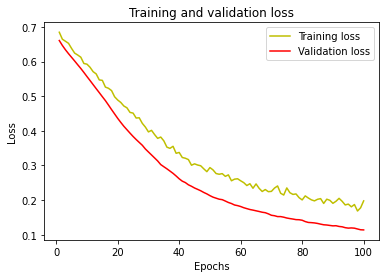

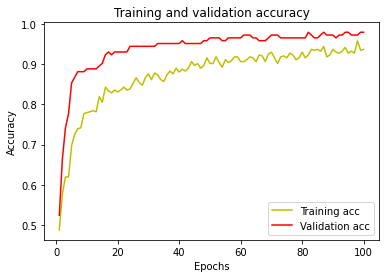

In [ ]:
#plot the training and validation accuracy and loss at each epoch

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
reconstructed_model = keras.models.load_model("/content/classifier.pkl")

In [ ]:
reconstructed_model.predict([[21.37, 15.1, 141.3, 1386, 0.1001, 0.1515, 0.1932, 0.1255, 0.1973, 0.06183, 0.3414, 1.309, 2.407, 39.06, 0.004426, 0.02675, 0.03437, 0.01343, 0.01675, 0.004367, 22.69, 21.48, 152.1, 1535, 0.1192, 0.284, 0.4024, 0.1966, 0.273, 0.08666]])

array([[1.]], dtype=float32)

In [ ]:
row = [21.37, 15.1, 141.3, 1386, 0.1001, 0.1515, 0.1932, 0.1255, 0.1973, 0.06183, 0.3414, 1.309, 2.407, 39.06, 0.004426, 0.02675, 0.03437, 0.01343, 0.01675, 0.004367, 22.69, 21.48, 152.1, 1535, 0.1192, 0.284, 0.4024, 0.1966, 0.273, 0.08666]
yhat = reconstructed_model.predict([row])
print('Predicted Class: %d' % yhat[0])

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow import keras

model = keras.models.load_model("/content/classifier.pkl", compile = True)


test_input = np.array([12.32, 12.39, 78.85, 464.1, 0.1028, 0.06981, 0.03987, 0.037, 0.1959, 0.05955, 0.236, 0.6656, 1.67, 17.43, 0.008045, 0.0118, 0.01683, 0.01241, 0.01924, 0.002248, 13.5, 15.64, 86.97, 549.1, 0.1385, 0.1266, 0.1242, 0.09391, 0.2827, 0.06771])    
test_input = test_input.reshape(1, -1)

new_data_scaled = scaler.transform(test_input)
new_data_scaled = test_input[:,0].astype(int)

samples_to_predict = []

for sample in new_data_scaled:
  # Add sample to array for prediction
  samples_to_predict.append(X_train[sample])


In [ ]:
# Convert into Numpy array
samples_to_predict = np.array(samples_to_predict)
print(samples_to_predict.shape)

(1, 30)


In [ ]:
# Generate predictions for samples
predictions = model.predict(samples_to_predict)
print("you can be affected by breast cancer by: ", predictions *100 , "%")

you can be affected by breast cancer by:  [[50.73133]] %


In [ ]:
def calc_mean_importance(importance_df_list):
    mean_importance = np.mean(
        np.array([df['importance'].values for df in importance_df_list]), axis=0)
    mean_df = importance_df_list[0].copy()
    mean_df['importance'] = mean_importance
    return mean_df

In [ ]:
if DO_FEAT_IMP:
    mean_gain_df = calc_mean_importance(gain_importance_list)
    plot_importance(mean_gain_df, title='Model feature importance by gain')
    mean_gain_df = mean_gain_df.reset_index().rename(columns={'index': 'feature_names'})
    mean_gain_df.to_csv('gain_importance_mean.csv', index=False)

In [ ]:
if DO_FEAT_IMP:
    mean_split_df = calc_mean_importance(split_importance_list)
    plot_importance(mean_split_df, title='Model feature importance by split')
    mean_split_df = mean_split_df.reset_index().rename(columns={'index': 'feature_names'})
    mean_split_df.to_csv('split_importance_mean.csv', index=False)